# 2. Übung Nichtlineare Regelungstechnik 1, Aufgabe 6

## Analyse des nichtlinearen Systems

System:

\begin{align*}
\dot x_1 &= 2 x_2^3 - 2 x_2\\
\dot x_2 &= x_1
\end{align*}

mit $(x_1,x_2) \in \mathbb{R}$

In diesem Notebook wird demonstriert, wie die Analyse eines nichtlinearen 
Systems in der Nähe seiner Ruhelagen durch Linearisierung unter Zuhilfenahme
von Python auf einem Rechner erfolgen kann.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2021-2023 Philipp Daferner, Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---


## Vorbereitungen

### Pakete

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Erweiterungen

In [2]:
# Erweiterung, damit Gleichungen im LaTeX-Format angezeigt werden
from sympy.interactive import printing
printing.init_printing()

## Berechnung

### System

Die Systemgleichungen werden zunächst mithilfe des sympy-Pakets angelegt. Dieses ermöglicht symbolisches Rechnen (analytisch).

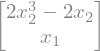

In [3]:
x1, x2 = sp.symbols('x1, x2')
f = sp.Matrix([2*x2**3-2*x2, x1])
f

### Punktsymmetrie
Für Systeme, die punktsymmetrisch zum Ursprung sind, gilt:

\begin{align*}
f_1(\bar{x}_1,\bar{x}_2) &= \pm f_1(x_1,x_2)\\
f_2(\bar{x}_1,\bar{x}_2) &= \pm f_2(x_1,x_2)
\end{align*}

mit $\bar{x}_{1,2} = -x_{1,2} $

Dies lässt sich wie folgt überprüfen:

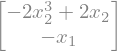

In [4]:
f_sym = f.subs([(x1, -x1), (x2, -x2)])
f_sym

Offensichtlich ist das System also punktsymmetrisch zum Ursprung.

### Ruhelagen
Zur Bestimmung der Ruhelagen werden die Nullstellen der Systemgleichungen berechnet:

In [5]:
sp.solve(f, [x1, x2])

### Jacobi-Matrix
Zunächst wird die allgemeine Jacobi-Matrix berechnet:

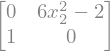

In [6]:
Df = f.jacobian([x1, x2])
Df

### Eigenwerte und -vektoren (numerisch)
Im Folgenden wird das System auf Grundlage der symbolisch berechneten Jacobi-Matrix analysiert.

Um diese schnell an gewünschten Stellen auswerten zu können, wird eine Python-Funktion erzeugt:

In [7]:
Df_fnc = sp.lambdify((x1, x2), Df, modules='numpy')

Zur Bestimmung der Eigenwerte wird die Jacobi-Matrix an den Ruhelagen ausgewertet.
#### Ruhelage $\mathbf{x}_{0,1} = (0,-1)$:

Jacobi-Matrix ausgewertet bei $\mathbf{x}_{0,1}$:

In [8]:
Df_1 = Df_fnc(0,-1)
Df_1

array([[0, 4],
       [1, 0]])

In [9]:
sp.pprint(np.linalg.eig(Df_1))
## pprint verwenden?

⎛[ 2. -2.],  [[ 0.89442719 -0.89442719]⎞
⎝            [ 0.4472136   0.4472136 ]]⎠


Bei dieser Ruhelage befindet sich also ein instabiler Sattelpunkt. Die stabile bzw. instabile Richtung werden durch die Eigenvektoren beschrieben.

Das Verhalten des linearisierten Systems in Umgebung der Ruhelage kann mittels der Python-Bibliothek *matplotlib* graphisch dargestellt werden.

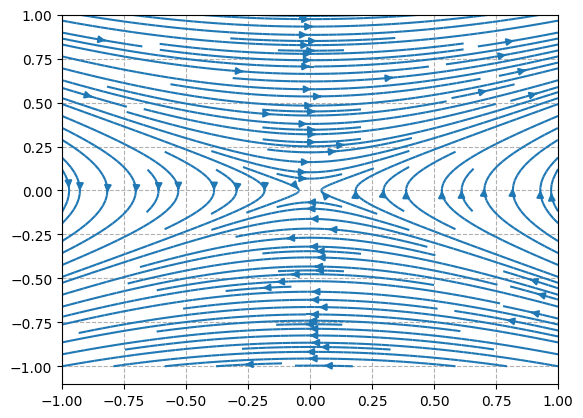

In [10]:
# Formatierung
xmax = 1
v, u = np.mgrid[-xmax:xmax:10j, -xmax:xmax:10j]
# Systemgleichungen
[[A, B], [C, D]] = Df_1
udot = A*u+B*v
vdot = C*u+D*v
# Plotten
plt.streamplot(u,v,udot,vdot, density=[1, 2])
plt.grid(linestyle='--')

#### Ruhelage $\mathbf{x}_{0,2} = (0,0)$:

Jacobi-Matrix ausgewertet bei $\mathbf{x}_{0,2}$:

In [11]:
Df_2 = Df_fnc(0,0)
Df_2

array([[ 0, -2],
       [ 1,  0]])

In [12]:
sp.pprint(np.linalg.eig(Df_2))
## pprint verwenden?

⎛[0.+1.41421356j 0.-1.41421356j],  [[0.81649658+0.j         0.81649658-0.j    
⎝                                  [0.        -0.57735027j 0.        +0.577350

    ]⎞
27j]]⎠


Der Ursprung kann ein Strudel oder Wirbel sein. Da die Eigenwerte der Jacobi-Matrix einen verschwindenden Realteil haben, kann aufgrund des linearisierten Systems keine Aussage über das nichtlineare Gesamtsystem getroffen werden, allerdings kann es sich wegen der Symmetrieeigenschaften nur um einen Wirbel handeln.


#### Ruhelage $\mathbf{x}_{0,3} = (0,1)$:

Jacobi-Matrix ausgewertet bei $\mathbf{x}_{0,3}$:

In [13]:
Df_3 = Df_fnc(0,1)
Df_3

array([[0, 4],
       [1, 0]])

In [14]:
sp.pprint(np.linalg.eig(Df_3))
## pprint verwenden?

⎛[ 2. -2.],  [[ 0.89442719 -0.89442719]⎞
⎝            [ 0.4472136   0.4472136 ]]⎠


Bei dieser Ruhelage befindet sich ein instabiler Sattelpunkt.

Plot des linearisierten Systems um die Ruhelage:

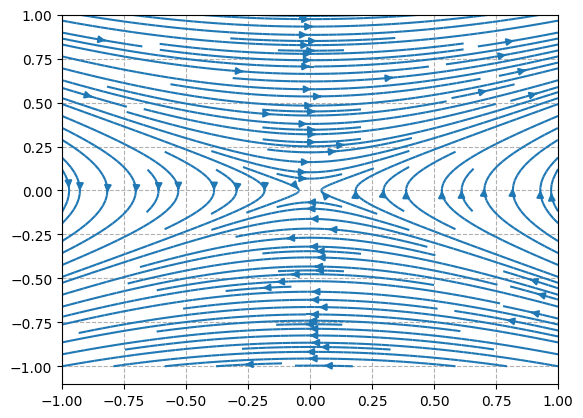

In [15]:
# Formatierung
xmax = 1
v, u = np.mgrid[-xmax:xmax:10j, -xmax:xmax:10j]
# Systemgleichungen
[[A, B], [C, D]] = Df_3
udot = A*u+B*v
vdot = C*u+D*v
# Plotten
plt.streamplot(u,v,udot,vdot, density=[1, 2])
plt.grid(linestyle='--')

### Ausgewiesene Menge
Die zu untersuchende Menge wird zunächst definiert.

In [16]:
p = x1-x2**2+1
p

Nun wird die Lie-Ableitung von $p$ auf $f$ gebildet:
$L_f p = \frac{\partial{p}}{\partial{x_1}} \dot x_1 + \frac{\partial{p}}{\partial{x_2}} \dot x_2 $

In [17]:
Lfp = p.diff(x1)*f[0] + p.diff(x2)*f[1]
Lfp

Auf $P$ gilt $x_1 = x_2^2-1$. Dies wird in die Lie-Ableitung eingesetzt und vereinfacht:

In [18]:
Lfp_subs = Lfp.subs(x1, x2**2-1)
Lfp_subs.simplify()

Ist eine Trajektorie also in der Menge $P$, verlässt sie diese nicht mehr. Es gibt also Trajektorien, die ganz in der Menge $P$ liegen.

### Phasenkurven
Zur Untersuchung der Phasenkurven wird $\frac{d x_2}{d x_1} = \frac{x_1}{2 x_2^3 - 2 x_2}$ nach Trennung der Veränderlichen integriert:
$\Phi(x_1,x_2) = \int \dot x_1 dx_2 - \int \dot x_2 dx_1$

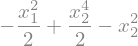

In [19]:
Phi = sp.integrate(f[0], x2) - sp.integrate(f[1], x1)
Phi

Die Phasenkurven haben also die Form $\Phi(x_1,x_2) = -\frac{x_1^2}{2}+\frac{x_2^4}{2}-x_2^2 + C$ für beliebige $C \in \mathbb{R}$.

### Phasenportrait des nichtlinearen Gesamtsystems
Abschließend wird nun noch das Phasenportrait des Gesamtsystems mit allen Ruhelagen dargestellt.

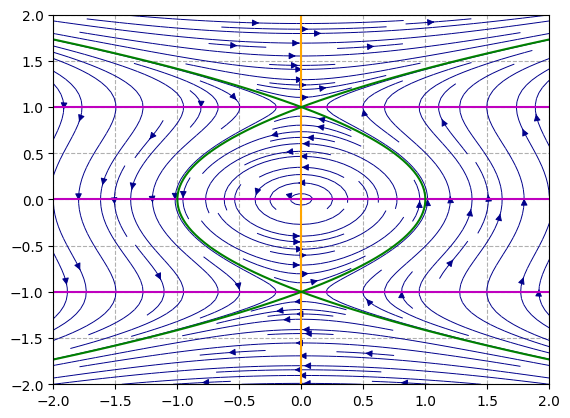

In [20]:
# Formatierung
xmax = 2
ymax = 2
plt.xlim(-xmax,xmax)
plt.ylim(-xmax,xmax)
plt.grid(linestyle='--')
# Initialisierung
x2, x1 = np.mgrid[-ymax:ymax:100j, -xmax:xmax:100j]
x1_1d = np.linspace(-xmax,xmax,100)
x2_1d = np.linspace(-ymax,ymax,100)
# Systemgleichungen
x1dot = 2*x2**3-2*x2
x2dot = x1
# Phasenportrait
plt.streamplot(x1,x2,x1dot,x2dot, density=[1, 2], linewidth=0.7, color='darkblue')
# horizontale Isobaren
plt.plot(x1_1d, np.ones(100), 'm')
plt.plot(x1_1d, np.zeros(100), 'm')
plt.plot(x1_1d, -np.ones(100), 'm')
# vertikale Isobare
plt.axvline(0, color='orange')
# Menge P
plt.plot(x2_1d**2-1, x2_1d, 'g')
plt.plot(-(x2_1d**2-1), x2_1d, 'g')

Zu sehen sind hier die $\color{darkblue}{\text{Trajektorien des Systems}}$, die $\color{orange}{\text{vertikalen}}$ und $\color{magenta}{\text{horizontalen}}$ Isobaren und die $\color{green}{\text{Menge $P$}}$.